# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


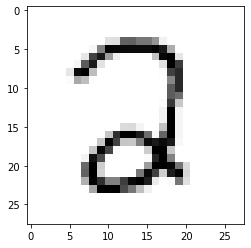

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2373
Training Accuracy: 0.7994, Testing Accuracy: 0.8105



Epoch 10, Loss 0.0551
Training Accuracy: 0.9402, Testing Accuracy: 0.9476



Epoch 20, Loss 0.04
Training Accuracy: 0.9553, Testing Accuracy: 0.9582



Epoch 30, Loss 0.0338
Training Accuracy: 0.9616, Testing Accuracy: 0.9627



Epoch 40, Loss 0.0302
Training Accuracy: 0.9658, Testing Accuracy: 0.9662



Epoch 50, Loss 0.0278
Training Accuracy: 0.9691, Testing Accuracy: 0.9677



Epoch 60, Loss 0.026
Training Accuracy: 0.9715, Testing Accuracy: 0.9672



Epoch 70, Loss 0.0246
Training Accuracy: 0.9725, Testing Accuracy: 0.9677



Epoch 80, Loss 0.0234
Training Accuracy: 0.9739, Testing Accuracy: 0.9682



Epoch 90, Loss 0.0223
Training Accuracy: 0.9745, Testing Accuracy: 0.9698



Epoch 100, Loss 0.0214
Training Accuracy: 0.9760, Testing Accuracy: 0.9682



Epoch 110, Loss 0.0206
Training Accuracy: 0.9764, Testing Accuracy: 0.9703



Epoch 120, Loss 0.0199
Training Accuracy: 0.9774, Testing Accuracy: 0.9703



Epoch 130, Loss 0.0192
Training Accuracy: 0.9786, Testing Accuracy: 0.9713



Epoch 140, Loss 0.0185
Training Accuracy: 0.9793, Testing Accuracy: 0.9718



Epoch 150, Loss 0.018
Training Accuracy: 0.9801, Testing Accuracy: 0.9733



Epoch 160, Loss 0.0174
Training Accuracy: 0.9808, Testing Accuracy: 0.9733



Epoch 170, Loss 0.0169
Training Accuracy: 0.9821, Testing Accuracy: 0.9738



Epoch 180, Loss 0.0164
Training Accuracy: 0.9825, Testing Accuracy: 0.9748



Epoch 190, Loss 0.016
Training Accuracy: 0.9831, Testing Accuracy: 0.9743



Epoch 200, Loss 0.0156
Training Accuracy: 0.9839, Testing Accuracy: 0.9748



Epoch 210, Loss 0.0152
Training Accuracy: 0.9844, Testing Accuracy: 0.9753



Epoch 220, Loss 0.0148
Training Accuracy: 0.9846, Testing Accuracy: 0.9768



Epoch 230, Loss 0.0144
Training Accuracy: 0.9851, Testing Accuracy: 0.9778



Epoch 240, Loss 0.0141
Training Accuracy: 0.9856, Testing Accuracy: 0.9788



0.01602481928585008

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2467
Training Accuracy: 0.6895, Testing Accuracy: 0.6784



Epoch 10, Loss 0.0998
Training Accuracy: 0.9180, Testing Accuracy: 0.9259



Epoch 20, Loss 0.0768
Training Accuracy: 0.9326, Testing Accuracy: 0.9420



Epoch 30, Loss 0.0663
Training Accuracy: 0.9396, Testing Accuracy: 0.9491



Epoch 40, Loss 0.06
Training Accuracy: 0.9445, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0557
Training Accuracy: 0.9477, Testing Accuracy: 0.9582



Epoch 60, Loss 0.0525
Training Accuracy: 0.9498, Testing Accuracy: 0.9607



Epoch 70, Loss 0.0501
Training Accuracy: 0.9513, Testing Accuracy: 0.9627



Epoch 80, Loss 0.0482
Training Accuracy: 0.9528, Testing Accuracy: 0.9652



Epoch 90, Loss 0.0465
Training Accuracy: 0.9533, Testing Accuracy: 0.9652



Epoch 100, Loss 0.0452
Training Accuracy: 0.9543, Testing Accuracy: 0.9667



Epoch 110, Loss 0.044
Training Accuracy: 0.9553, Testing Accuracy: 0.9677



Epoch 120, Loss 0.043
Training Accuracy: 0.9561, Testing Accuracy: 0.9682



Epoch 130, Loss 0.0421
Training Accuracy: 0.9571, Testing Accuracy: 0.9682



Epoch 140, Loss 0.0413
Training Accuracy: 0.9575, Testing Accuracy: 0.9682



Epoch 150, Loss 0.0406
Training Accuracy: 0.9582, Testing Accuracy: 0.9693



Epoch 160, Loss 0.04
Training Accuracy: 0.9588, Testing Accuracy: 0.9688



Epoch 170, Loss 0.0394
Training Accuracy: 0.9589, Testing Accuracy: 0.9698



Epoch 180, Loss 0.0389
Training Accuracy: 0.9594, Testing Accuracy: 0.9693



Epoch 190, Loss 0.0384
Training Accuracy: 0.9597, Testing Accuracy: 0.9688



Epoch 200, Loss 0.0379
Training Accuracy: 0.9604, Testing Accuracy: 0.9688



Epoch 210, Loss 0.0375
Training Accuracy: 0.9611, Testing Accuracy: 0.9682



Epoch 220, Loss 0.0371
Training Accuracy: 0.9614, Testing Accuracy: 0.9688



Epoch 230, Loss 0.0367
Training Accuracy: 0.9614, Testing Accuracy: 0.9693



Epoch 240, Loss 0.0364
Training Accuracy: 0.9616, Testing Accuracy: 0.9693



0.019694388651284332

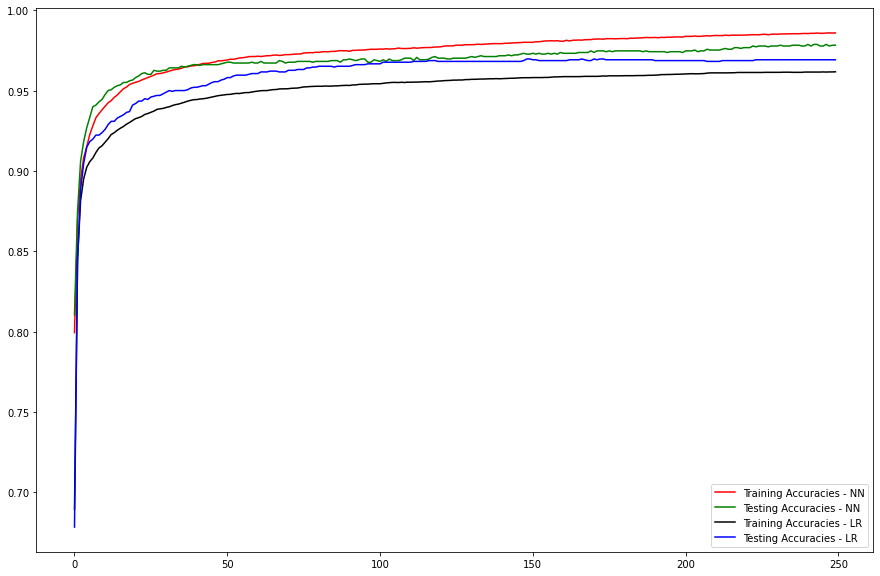

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

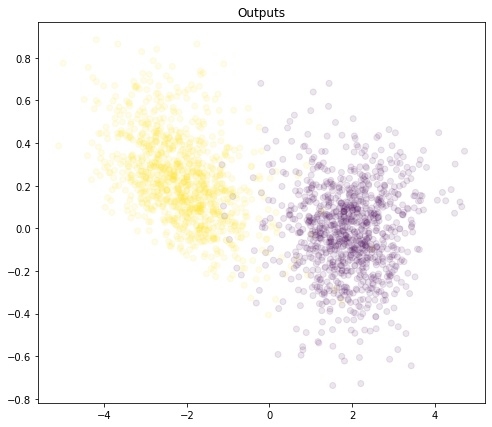

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

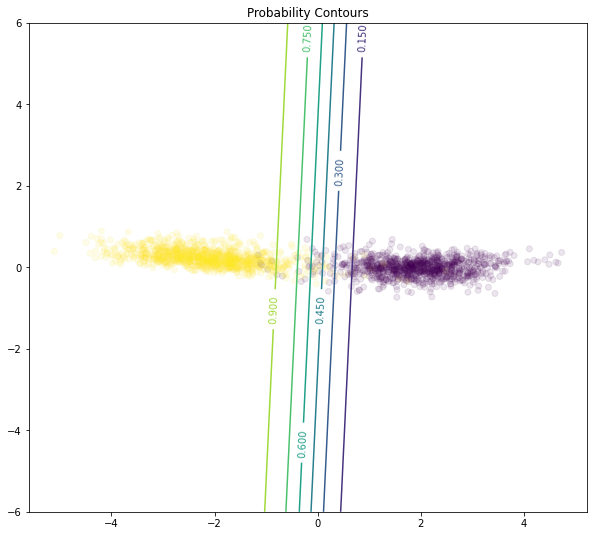

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );